In [1]:
from miexp.models.btransformer import BooleanTransformerNoEmbedding


model = BooleanTransformerNoEmbedding.load_from_checkpoint("model.ckpt")

/Users/henryscheible/miexp/src/miexp/models/btransformer.py:172: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(


In [2]:
model

BooleanTransformerNoEmbedding(
  (transformer_layer): TransformerEncoderLayer(
    (self_attn): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=3, out_features=3, bias=True)
    )
    (linear1): Linear(in_features=3, out_features=3, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (linear2): Linear(in_features=3, out_features=3, bias=True)
    (norm1): LayerNorm((3,), eps=1e-05, elementwise_affine=True)
    (norm2): LayerNorm((3,), eps=1e-05, elementwise_affine=True)
    (dropout1): Dropout(p=0.1, inplace=False)
    (dropout2): Dropout(p=0.1, inplace=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=3, out_features=3, bias=True)
    (1): ReLU()
    (2): Linear(in_features=3, out_features=2, bias=True)
  )
)

<Axes: >

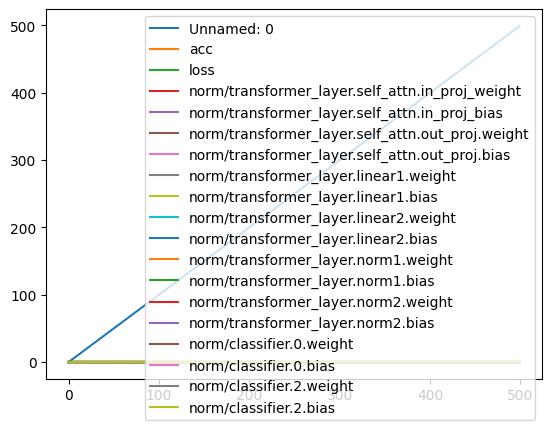

In [3]:
import pandas as pd


pd.read_csv("logs.csv").plot()

In [4]:
{name: param.shape for name, param in model.transformer_layer.named_parameters()}

{'self_attn.in_proj_weight': torch.Size([9, 3]),
 'self_attn.in_proj_bias': torch.Size([9]),
 'self_attn.out_proj.weight': torch.Size([3, 3]),
 'self_attn.out_proj.bias': torch.Size([3]),
 'linear1.weight': torch.Size([3, 3]),
 'linear1.bias': torch.Size([3]),
 'linear2.weight': torch.Size([3, 3]),
 'linear2.bias': torch.Size([3]),
 'norm1.weight': torch.Size([3]),
 'norm1.bias': torch.Size([3]),
 'norm2.weight': torch.Size([3]),
 'norm2.bias': torch.Size([3])}

In [12]:
class SaveOutput:
    def __init__(self):
        self.outputs = {}
 
    def __call__(self, module, module_in, module_out):
        self.outputs[module] = (module_in, module_out)
 
    def clear(self):
        self.outputs = {}

In [13]:
save_output = SaveOutput()

for name, module in model.named_modules():
    module.register_forward_hook(save_output)

In [14]:
import torch


model(torch.tensor([[1, 0, 0, 1]]))

tensor([[ 0.1152, -0.2846]], grad_fn=<AddmmBackward0>)

In [15]:
save_output.outputs

{MultiheadAttention(
   (out_proj): NonDynamicallyQuantizableLinear(in_features=3, out_features=3, bias=True)
 ): ((tensor([[[0., 0., 1.],
            [0., 1., 0.],
            [1., 0., 0.],
            [1., 0., 0.],
            [0., 1., 0.]]]),
   tensor([[[0., 0., 1.],
            [0., 1., 0.],
            [1., 0., 0.],
            [1., 0., 0.],
            [0., 1., 0.]]]),
   tensor([[[0., 0., 1.],
            [0., 1., 0.],
            [1., 0., 0.],
            [1., 0., 0.],
            [0., 1., 0.]]])),
  (tensor([[[-0.2049,  0.1204,  0.2120],
            [ 0.4154,  0.3231, -0.2042],
            [ 0.0130, -0.0771,  0.1626],
            [ 0.0130, -0.0771,  0.1626],
            [-0.0476,  0.0623, -0.0106]]], grad_fn=<ViewBackward0>),
   None)),
 Dropout(p=0.1, inplace=False): ((tensor([[[-0.2049,  0.1204,  0.2120],
            [ 0.4154,  0.3231, -0.2042],
            [ 0.0130, -0.0771,  0.1626],
            [ 0.0130, -0.0771,  0.1626],
            [-0.0476,  0.0623, -0.0106]]], grad_

In [5]:
model.transformer_layer.self_attn

MultiheadAttention(
  (out_proj): NonDynamicallyQuantizableLinear(in_features=3, out_features=3, bias=True)
)

In [6]:
import torch


model.transformer_layer.self_attn(torch.tensor([[2, 0, 1], [0, 1, 0], [1, 0, 1]]).unsqueeze(0))

TypeError: MultiheadAttention.forward() missing 2 required positional arguments: 'key' and 'value'